# Stroke Predction Project 

[![Follow @StrokePred on Twitter](https://img.shields.io/twitter/follow/strokepred?style=social)](https://twitter.com/StrokePred)


#### This project is done as a requirement of T5 Bootscamp by Jefn Alshammari and Abdulaziz Almass

<img src="https://topnews.in/healthcare/sites/default/files/styles/large/public/Stroke7.jpg?itok=xInaWFYK" width="200" height="200">

## 1- Data Collection

The dataset is found at [Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

The following Python libraries is imported in our project: 

* Pandas

* Numpy

* Matplotlib

* Seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

stroke_df = pd.read_csv("https://raw.githubusercontent.com/jefnkhalaf/Stroke-Prediction/main/MVP/stroke.csv")

In [ ]:
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
print("Number of data points in our dataset is: "+str(len(stroke_df.index)))

Number of data points in our dataset is: 5110


In [ ]:
print("Number of dependent and independent variables in our dataset is: "+str(len(stroke_df.columns)))

Number of dependent and independent variables in our dataset is: 12


## 2- Data Wrangling / Cleaning

In [ ]:
stroke_df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

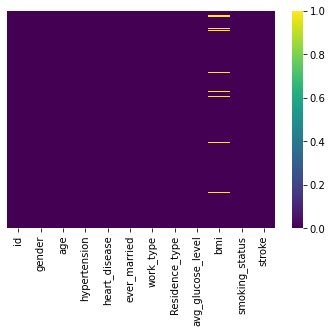

In [ ]:
sns.heatmap(stroke_df.isnull(), yticklabels=False, cmap="viridis");

In [ ]:
#Finding the mean of the column "bmi" having NaN
mean_bmi=stroke_df['bmi'].mean()
  
# Replace NaNs in column "bmi" with the mean value of bmi
stroke_df['bmi'].fillna(value=mean_bmi, inplace=True)
print("The mean value of BMI = " +str(mean_bmi))

The mean value of BMI = 28.893236911794673


In [ ]:
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#Gendercheck = pd.get_dummies(stroke_df['gender'], drop_first=True)
#Gendercheck.head(5)

#### Discover how many records with "stroke" value of 1

In [ ]:
print("Number of people who ever got a stroke is: "+str(sum(stroke_df['stroke'] == 1))+" out of "+str(len(stroke_df.index)))

Number of people who ever got a stroke is: 249 out of 5110


In [ ]:
print("Number of people with gender 'other' is: "+str(sum(stroke_df['gender'] == 'Other')))

Number of people with gender 'other' is: 1


#### Since number of records with gender of "Other" is only one record, it is better to be dropped.

In [ ]:
stroke_df.drop(stroke_df[stroke_df['gender'] == "Other"].index, inplace = True)

#### It is needed to discover how many "Unknown" values of the smoking status.

In [ ]:
print("Number of Unknown cases if smoking is: "+str(sum(stroke_df['smoking_status'] == "Unknown")))

Number of Unknown cases if smoking is: 1544


#### Since it influences the analysis and we should get the smoking status, records with "Unkown" status are droped

In [ ]:
stroke_df.drop(stroke_df[stroke_df['smoking_status'] == "Unknown"].index, inplace = True)

#### Now we discover how many records with stroke value of "1" is remaining after dropping the records with "Unknown" smoking status 

In [ ]:
print("Number of Unknown cases if smoking is: "+str(sum(stroke_df['smoking_status'] == "Unknown")))

Number of Unknown cases if smoking is: 0


#### We get to discover how many data points / records are remaining to make sure it the exact number 

In [ ]:
print("Number of data points in our dataset is: "+str(len(stroke_df.index)))

Number of data points in our dataset is: 3565


In [ ]:
print("Number of people who ever got a stroke is: "+str(sum(stroke_df['stroke'] == 1))+" out of "+str(len(stroke_df.index)))

Number of people who ever got a stroke is: 202 out of 3565


#### One - hot - encoding 

In [ ]:
Gender = pd.get_dummies(stroke_df['gender'], drop_first=True)
Gender.head(2)

,Male
0,1
1,0


In [ ]:
Ever_married = pd.get_dummies(stroke_df['ever_married'], drop_first=True)
Ever_married.head(2)

,Yes
0,1
1,1


In [ ]:
Residence = pd.get_dummies(stroke_df['Residence_type'], drop_first=True)
Residence.head(2)

,Urban
0,1
1,0


In [ ]:
Work = pd.get_dummies(stroke_df['work_type'])
Work.head(2)

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,0,1,0


In [ ]:
Smoking = pd.get_dummies(stroke_df['smoking_status'])
Smoking.head(2)

,formerly smoked,never smoked,smokes
0,1,0,0
1,0,1,0


In [ ]:
stroke_df.drop(['id', 'gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status'], axis=1, inplace=True)
stroke_df = pd.concat([stroke_df, Gender, Ever_married, Residence, Work, Smoking],axis=1)
stroke_df.rename(columns={'Yes': 'ever_married'}, inplace=True)
stroke_df.head(20)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,ever_married,Urban,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.600000,1,1,1,1,0,0,1,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,1,0,0,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,1,0,0,1,0,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,0,0,1,0,0,1,0
5,81.0,0,0,186.21,29.000000,1,1,1,1,0,0,1,0,0,1,0,0
6,74.0,1,1,70.09,27.400000,1,1,1,0,0,0,1,0,0,0,1,0
7,69.0,0,0,94.39,22.800000,1,0,0,1,0,0,1,0,0,0,1,0
10,81.0,1,0,80.43,29.700000,1,0,1,0,0,0,1,0,0,0,1,0
11,61.0,0,1,120.46,36.800000,1,0,1,0,1,0,0,0,0,0,0,1


In [ ]:
stroke_df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
Male                 0
ever_married         0
Urban                0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
children             0
formerly smoked      0
never smoked         0
smokes               0
dtype: int64

## 2- Data Analysis

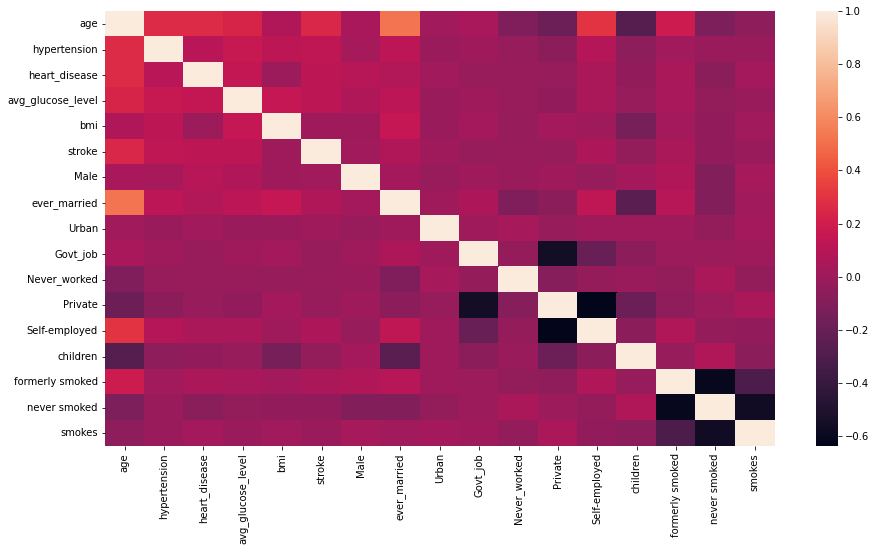

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(stroke_df.corr())

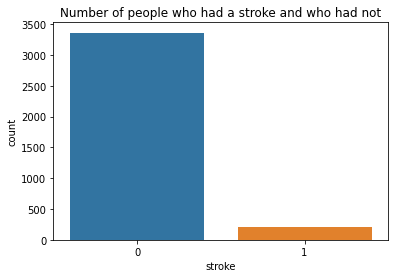

In [ ]:
sns.countplot(x="stroke", data=stroke_df);
plt.title("Number of people who had a stroke and who had not");

In [ ]:
import plotly.express as px
fig_age = px.histogram(stroke_df, x='age', color='stroke', barmode='group')
fig_age.update_layout(bargap=0.2)
fig_age.show()

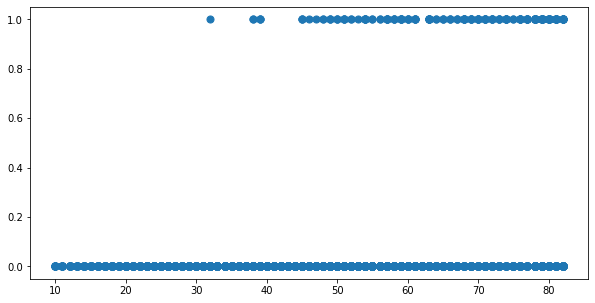

In [ ]:
plt.figure(figsize = [10,5])
plt.scatter(stroke_df['age'], stroke_df['stroke'], s =50);

In [ ]:
#sns.boxplot(x="age", y="stroke", data=stroke_df);

In [ ]:
import plotly.express as px
fig_age = px.histogram(stroke_df, x='bmi', color='stroke', barmode='group')
fig_age.update_layout(bargap=0.2)
fig_age.show()

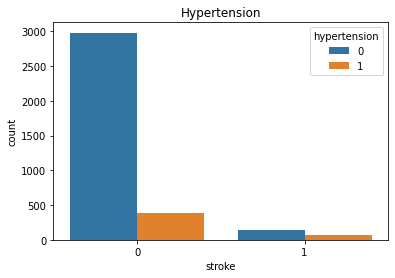

In [ ]:
sns.countplot(x="stroke", hue="hypertension", data=stroke_df);
plt.title("Hypertension");

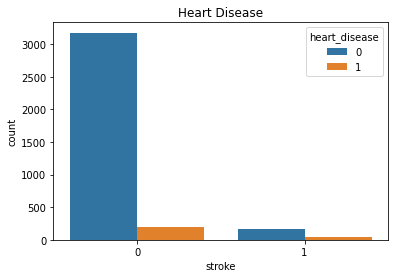

In [ ]:
sns.countplot(x="stroke", hue="heart_disease", data=stroke_df);
plt.title("Heart Disease");

In [ ]:
import plotly.express as px
fig_age = px.histogram(stroke_df, x='avg_glucose_level', color='stroke', barmode='group')
fig_age.update_layout(bargap=0.2)
fig_age.show()

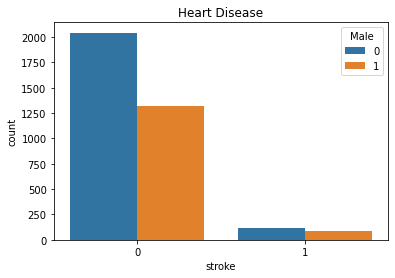

In [ ]:
sns.countplot(x="stroke", hue="Male", data=stroke_df);
plt.title("Heart Disease");

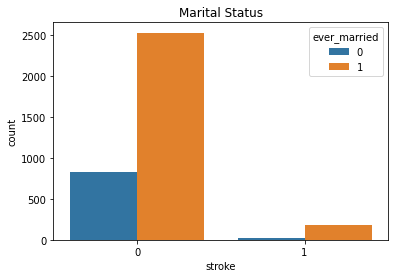

In [ ]:
sns.countplot(x="stroke", hue="ever_married", data=stroke_df);
plt.title("Marital Status");

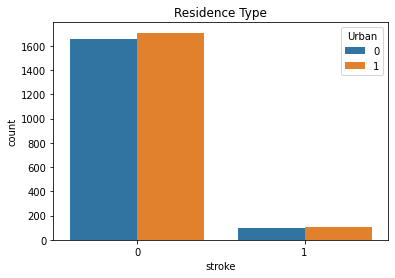

In [ ]:
sns.countplot(x="stroke", hue="Urban", data=stroke_df);
plt.title("Residence Type");

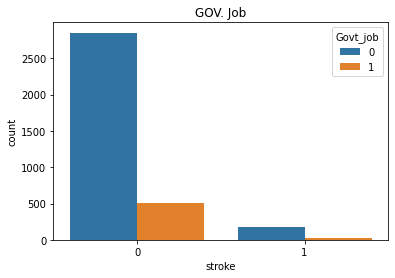

In [ ]:
sns.countplot(x="stroke", hue="Govt_job", data=stroke_df);
plt.title("GOV. Job");

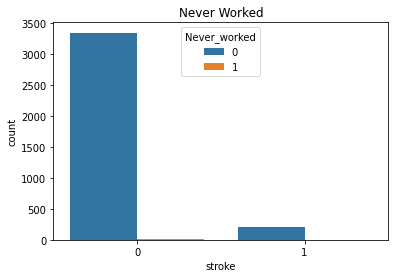

In [ ]:
sns.countplot(x="stroke", hue="Never_worked", data=stroke_df);
plt.title("Never Worked");

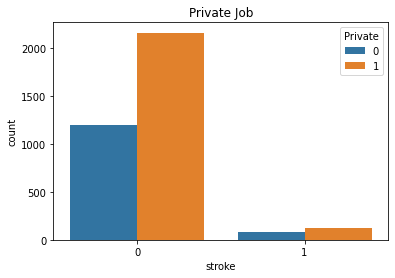

In [ ]:
sns.countplot(x="stroke", hue="Private", data=stroke_df);
plt.title("Private Job");

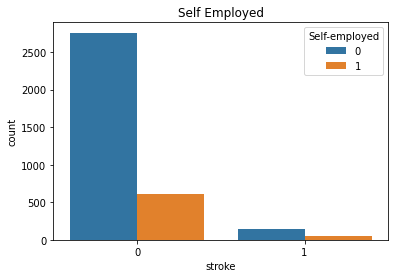

In [ ]:
sns.countplot(x="stroke", hue="Self-employed", data=stroke_df);
plt.title("Self Employed");

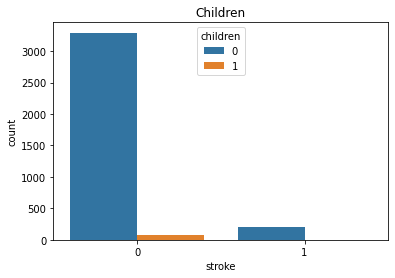

In [ ]:
sns.countplot(x="stroke", hue="children", data=stroke_df);
plt.title("Children");

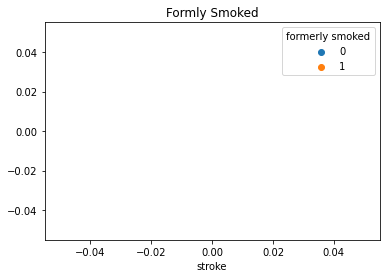

In [ ]:
sns.boxplot(x="stroke", hue="formerly smoked", data=stroke_df);
plt.title("Formly Smoked");

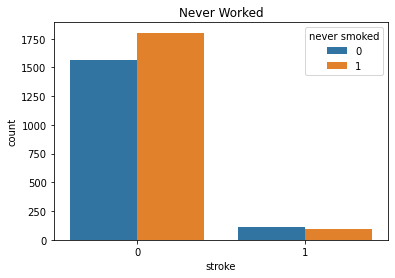

In [ ]:
sns.countplot(x="stroke", hue="never smoked", data=stroke_df);
plt.title("Never Worked");

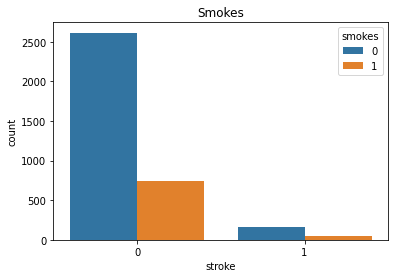

In [ ]:
sns.countplot(x="stroke", hue="smokes", data=stroke_df);
plt.title("Smokes");

In [ ]:
x = stroke_df.loc[:, stroke_df.columns != 'stroke']
y = stroke_df['stroke']

In [ ]:
x.head(1)

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,ever_married,Urban,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,0,1,0,0,1,0,0


# Imbalance Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


logmodel = LogisticRegression(C = 0.95)
logmodel.fit(X_train,y_train)



LogisticRegression(C=0.95)

In [ ]:
logmodel.score(X_train,y_train)


0.9467040673211781

In [ ]:
logmodel.score(X_test,y_test)


0.9298737727910238

In [ ]:
logmodel.coef_

array([[ 7.46466767e-02,  4.33261503e-01,  1.39596789e-01,
         3.96138516e-03, -4.68395973e-04, -7.13380021e-02,
        -1.33400997e-01, -1.48864464e-01, -1.42369649e+00,
        -6.01537618e-02, -8.83439521e-01, -1.53318400e+00,
        -4.36174976e-01, -1.32669545e+00, -1.65775662e+00,
        -1.35219668e+00]])

In [ ]:
 y_prob_pred_test = logmodel.predict_proba(X_test)[:,1]
print(log_loss(y_test,y_prob_pred_test))

0.2259399244216688


In [ ]:
predictions = logmodel.predict(X_test)

print(predictions[0:5])

from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

accuracy=accuracy_score(y_test,predictions)
accuracy

[0 0 0 0 0]


0.9298737727910238

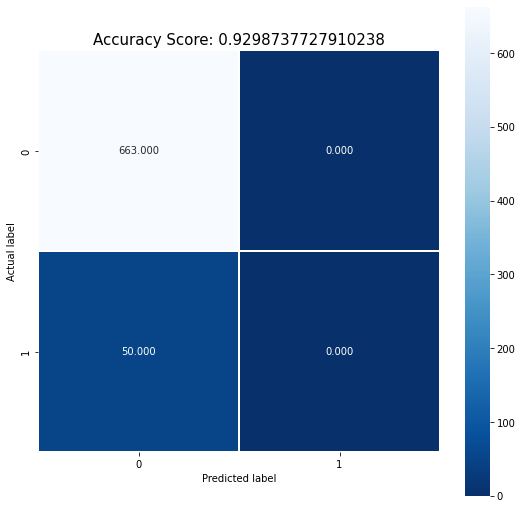

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test,predictions)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable
    
lr = classification_report(y_test,predictions)
  
print(lr)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       663
           1       0.00      0.00      0.00        50

    accuracy                           0.93       713
   macro avg       0.46      0.50      0.48       713
weighted avg       0.86      0.93      0.90       713



#### The confusion matrix and classification report show imbalanced dataset and the dataset needs balancing

# Dataset Balancing using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

1    3363
0    3363
Name: stroke, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
#result = X_train.combine_first(y_train, axis=1)
df = X_train
s = y_train
# Merge by creating DataFrame from Series
df2=df.merge(s.to_frame(), left_index=True, right_index=True)
print(df2)

            age  hypertension  heart_disease  ...  never smoked  smokes  stroke
4597  77.039341             0              0  ...             0       0       1
3905  56.318499             1              0  ...             0       0       1
2556  35.000000             0              0  ...             1       0       0
5529  73.912940             0              0  ...             0       0       1
1920  70.000000             1              1  ...             1       0       0
...         ...           ...            ...  ...           ...     ...     ...
21    65.000000             0              0  ...             0       0       1
2196  43.000000             0              0  ...             0       1       0
1997  29.000000             1              0  ...             0       0       0
3911  80.850115             0              1  ...             1       0       1
870   42.000000             0              0  ...             1       0       0

[5380 rows x 17 columns]


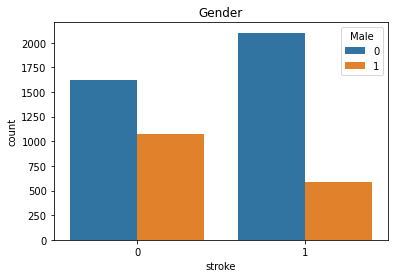

In [ ]:
sns.countplot(x="stroke", hue="Male", data=df2);
plt.title("Gender");

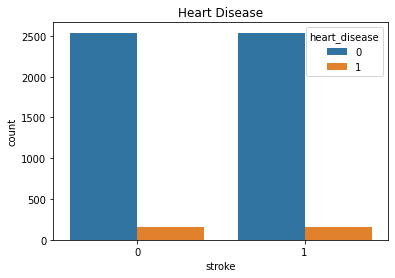

In [ ]:
sns.countplot(x="stroke", hue="heart_disease", data=df2);
plt.title("Heart Disease");

In [ ]:
import plotly.express as px
fig_age = px.histogram(df2, x='avg_glucose_level', color='stroke', barmode='group')
fig_age.update_layout(bargap=0.2)
fig_age.show()

In [ ]:
fig_age = px.histogram(df2, x='hypertension', color='stroke', barmode='group')
fig_age.update_layout(bargap=0.2)
fig_age.show()

In [ ]:
fig_age = px.histogram(df2, x='bmi', color='stroke', barmode='group')
fig_age.update_layout(bargap=0.2)
fig_age.show()

In [ ]:
fig_age = px.histogram(df2, x='age', color='stroke', barmode='group')
fig_age.update_layout(bargap=0.2)
fig_age.show()

In [ ]:
# Number of classes in training Data
y_train.value_counts()

1    2690
0    2690
Name: stroke, dtype: int64

## Logistc Regression (no Scalling)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
logmodel.score(X_train,y_train)

0.9022304832713754

In [ ]:
logmodel.score(X_test,y_test)

0.9041604754829123

In [ ]:
logmodel.coef_

array([[ 0.11233979, -0.4910054 , -0.93518666,  0.0052281 ,  0.05884823,
        -0.60763632, -0.61000345, -0.78263501, -4.3191744 , -0.05319319,
        -3.1420631 , -4.13376589, -0.2679665 , -4.20796831, -4.68576319,
        -4.18301779]])

In [ ]:
#on the left ([[,]])is no stroke 0 and on the right is stroke 1 
y_prob_pred_test = logmodel.predict_proba(X_test) # [:,we took all rows and first column to predict stroke [,1]
y_prob_pred_test

array([[5.21955289e-03, 9.94780447e-01],
       [1.86039800e-01, 8.13960200e-01],
       [9.75049525e-01, 2.49504752e-02],
       ...,
       [3.79175939e-04, 9.99620824e-01],
       [9.31243127e-01, 6.87568729e-02],
       [1.89365460e-01, 8.10634540e-01]])

In [ ]:
#soft classification to predict stroke 1 or no stroke 0
y_prob_pred_test = logmodel.predict_proba(X_test)[:,1] # we took all rows and first column to predict stroke 
print(log_loss(y_test,y_prob_pred_test)) # cost function to calc log reg: from 0 to 1. if less than 0.50 no storke and more is stroke

0.21297550838441603


In [ ]:
predictions = logmodel.predict(X_test)

print(predictions[0:5]) #from index 0 to index 5, give me the 5 rows to be read 0-4. 5 is execludded (slicing)

[1 1 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

# y_true = y_test, y_pred = the y that i predicted (y_pred= predictions)
accuracy_score(y_true, y_pred) # predict % correctly/ (predict % correctly)+(predict % wrongly) #ratto. 

accuracy=accuracy_score(y_test,predictions)
accuracy

0.9041604754829123

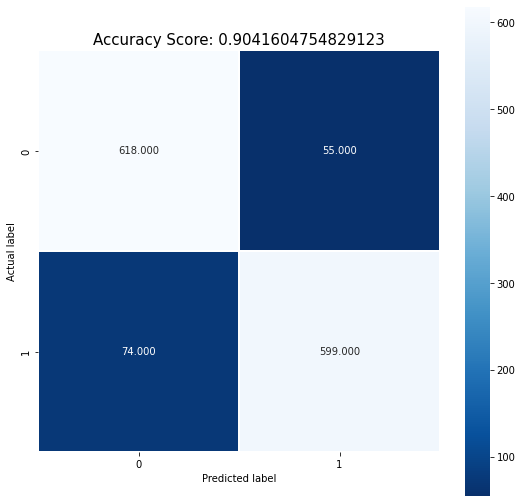

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix 

classification_report(y_test,predictions)

cm = confusion_matrix (y_test,predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable

LR_NotScaled_Report = classification_report(y_test,predictions)
  
print(LR_NotScaled_Report)


              precision    recall  f1-score   support

           0       0.89      0.92      0.91       673
           1       0.92      0.89      0.90       673

    accuracy                           0.90      1346
   macro avg       0.90      0.90      0.90      1346
weighted avg       0.90      0.90      0.90      1346



In [ ]:
#report = classification_report(y_test, y_pred, output_dict=True)
#df = pandas.DataFrame(report).transpose()

## Logistic Regression Scaled

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
logistic_model.coef_ # 1.32608389 = first featur

array([[ 1.72178683, -0.09761003, -0.15638081,  0.34748971,  0.09948326,
        -0.3174579 , -0.27413733, -0.35991721, -2.0284882 , -0.34848289,
        -2.94833379, -2.34390367, -0.74314664, -2.46783811, -3.23654885,
        -2.16500981]])

In [ ]:
X_train.head() #age is the most important feature even after scaling

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,ever_married,Urban,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
4597,77.039341,0,0,136.509078,26.626077,1,1,1,0,0,0,0,0,1,0,0
3905,56.318499,1,0,78.361169,27.953129,0,1,0,0,0,0,0,0,1,0,0
2556,35.000000,0,0,123.830000,23.800000,0,0,0,0,0,1,0,0,0,1,0
5529,73.912940,0,0,96.392836,27.535490,0,1,0,0,0,0,0,0,0,0,0
1920,70.000000,1,1,93.620000,35.800000,1,1,0,0,0,1,0,0,0,1,0


In [ ]:
# fitness check by the score reslut 
y_train_pred = logistic_model.predict(X_train_scaled) # predict y_train so i can see accuracy score
y_test_pred = logistic_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy =  accuracy_score(y_test, y_test_pred)

print('Train accuracy score is ', train_accuracy)
print('Test accuracy score is ', test_accuracy)

Train accuracy score is  0.9063197026022305
Test accuracy score is  0.9108469539375929


In [ ]:
predictions = logistic_model.predict(X_test_scaled)

accuracy=accuracy_score(y_test,predictions)
accuracy

0.9108469539375929

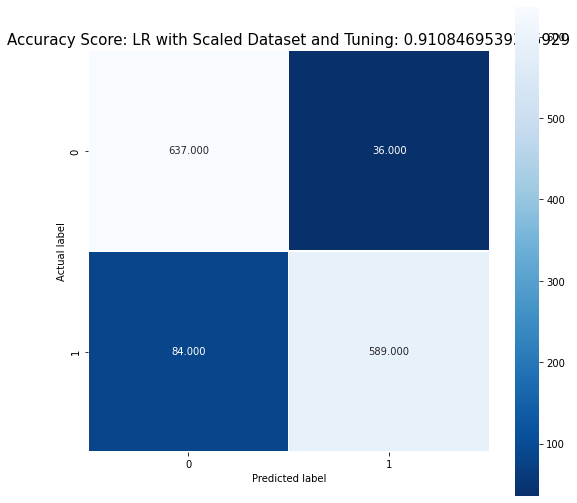

In [ ]:
classification_report(y_test,predictions)

cm = confusion_matrix (y_test,predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: LR with Scaled Dataset and Tuning: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable
    
LR_Scaled_Report = classification_report(y_test,predictions)
  
print(LR_Scaled_Report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       673
           1       0.94      0.88      0.91       673

    accuracy                           0.91      1346
   macro avg       0.91      0.91      0.91      1346
weighted avg       0.91      0.91      0.91      1346



## Logistic Regression Hyperparameter Tuning Scaled

In [ ]:
# c value 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameter_dictionary = {'C': [0.0001, 0.001, 0.01, 0.1, 10,12, 13, 16, 17]}

In [ ]:
logistic_model = LogisticRegression()

clf =  RandomizedSearchCV(logistic_model, parameter_dictionary)

clf.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 10, 12,
                                              13, 16, 17]})

In [ ]:
# 10 is the best value for c 
clf.best_params_

{'C': 10}

In [ ]:
logistic_model = LogisticRegression(C =0.1)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1)

In [ ]:
predictions = logistic_model.predict(X_test_scaled)

accuracy=accuracy_score(y_test,predictions)
accuracy

0.912332838038633

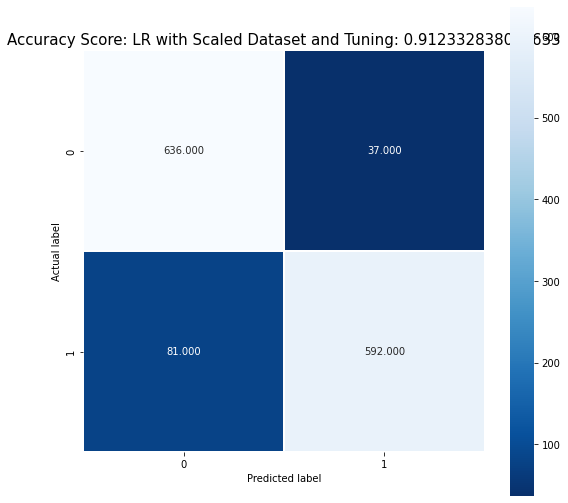

In [ ]:
predictions = logistic_model.predict(X_test_scaled)

classification_report(y_test,predictions)

cm = confusion_matrix (y_test,predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: LR with Scaled Dataset and Tuning: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable
    
LR_HP_Scaled_Report = classification_report(y_test,predictions)
  
print(LR_HP_Scaled_Report)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       673
           1       0.94      0.88      0.91       673

    accuracy                           0.91      1346
   macro avg       0.91      0.91      0.91      1346
weighted avg       0.91      0.91      0.91      1346



## KNN Scaled



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,ever_married,Urban,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
4597,77.039341,0,0,136.509078,26.626077,1,1,1,0,0,0,0,0,1,0,0
3905,56.318499,1,0,78.361169,27.953129,0,1,0,0,0,0,0,0,1,0,0
2556,35.000000,0,0,123.830000,23.800000,0,0,0,0,0,1,0,0,0,1,0
5529,73.912940,0,0,96.392836,27.535490,0,1,0,0,0,0,0,0,0,0,0
1920,70.000000,1,1,93.620000,35.800000,1,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,65.000000,0,0,100.980000,28.200000,0,1,0,0,0,1,0,0,1,0,0
2196,43.000000,0,0,104.550000,23.900000,0,1,1,1,0,0,0,0,0,0,1
1997,29.000000,1,0,77.550000,28.893237,1,1,1,0,0,1,0,0,1,0,0
3911,80.850115,0,1,104.967871,29.312070,1,1,0,0,0,0,0,0,0,1,0


In [ ]:
X_train_scaled

array([[ 1.01880322, -0.34861769, -0.24515   , ...,  2.05877607,
        -0.80484749, -0.39935292],
       [-0.09432998,  2.86847178, -0.24515   , ...,  2.05877607,
        -0.80484749, -0.39935292],
       [-1.23956963, -0.34861769, -0.24515   , ..., -0.48572548,
         1.24247142, -0.39935292],
       ...,
       [-1.56189241,  2.86847178, -0.24515   , ...,  2.05877607,
        -0.80484749, -0.39935292],
       [ 1.22351977, -0.34861769,  4.07913523, ..., -0.48572548,
         1.24247142, -0.39935292],
       [-0.86352639, -0.34861769, -0.24515   , ..., -0.48572548,
         1.24247142, -0.39935292]])

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy =  accuracy_score(y_test, y_test_pred)

print('Train accuracy score is ', train_accuracy)
print('Test accuracy score is ', test_accuracy)

Train accuracy score is  0.9531598513011152
Test accuracy score is  0.9405646359583952


In [ ]:
predictions = knn_model.predict(X_test_scaled)

accuracy=accuracy_score(y_test,predictions)
accuracy

0.9405646359583952

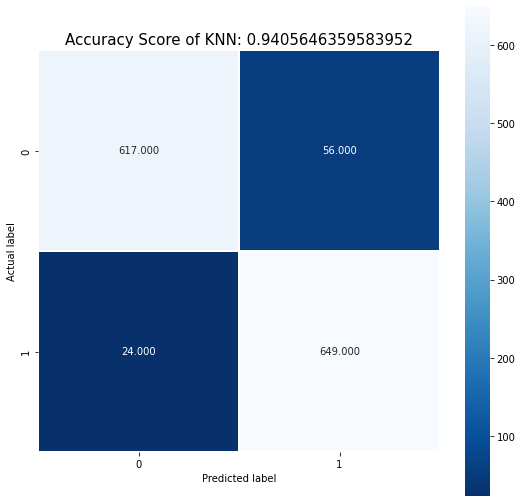

In [ ]:
classification_report(y_test,predictions)

cm = confusion_matrix (y_test,predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of KNN: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable
    
KNN_Scaled_Report = classification_report(y_test,predictions)
  
print(KNN_Scaled_Report)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       673
           1       0.92      0.96      0.94       673

    accuracy                           0.94      1346
   macro avg       0.94      0.94      0.94      1346
weighted avg       0.94      0.94      0.94      1346



## Decision Tree Scaled

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred = tree_model.predict(X_train_scaled)
y_test_pred = tree_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy =  accuracy_score(y_test, y_test_pred)

print('Train accuracy score is ', train_accuracy)
print('Test accuracy score is ', test_accuracy)

Train accuracy score is  1.0
Test accuracy score is  0.9294205052005944


In [ ]:
predictions = tree_model.predict(X_test_scaled)

accuracy=accuracy_score(y_test,predictions)
accuracy

0.9294205052005944

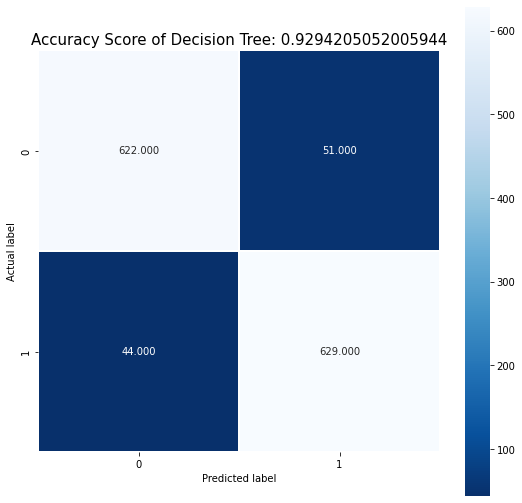

In [ ]:
classification_report(y_test,predictions)

cm = confusion_matrix (y_test,predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of Decision Tree: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable
    
DT_Scaled_Report = classification_report(y_test,predictions)
  
print(DT_Scaled_Report)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       673
           1       0.93      0.93      0.93       673

    accuracy                           0.93      1346
   macro avg       0.93      0.93      0.93      1346
weighted avg       0.93      0.93      0.93      1346



## SVM (no scalling)

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

SVC()

In [ ]:
model.score(X_test, y_test)

0.7444279346210996

 1. Regularization (C)

In [ ]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.7444279346210996

In [ ]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.7778603268945022

2. Gamma

In [ ]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.7280832095096582

3. Kernel

In [ ]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
model_linear_kernal.score(X_test, y_test)

0.913075780089153

In [ ]:
predictions = model_linear_kernal.predict(X_test)

accuracy=accuracy_score(y_test,predictions)
accuracy

0.913075780089153

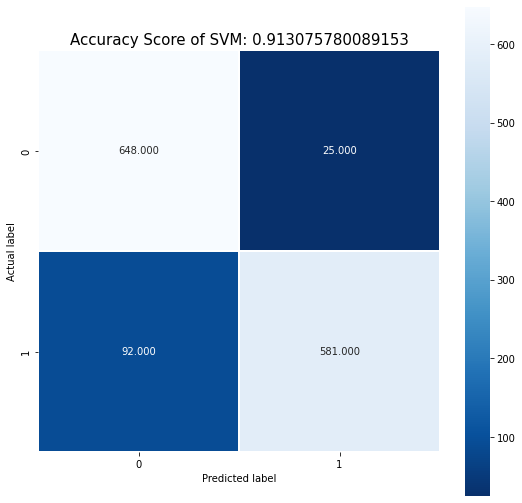

In [ ]:
classification_report(y_test,predictions)

cm = confusion_matrix (y_test,predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of SVM: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable
    
SVM_NotScaled_Report = classification_report(y_test,predictions)
  
print(SVM_NotScaled_Report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       673
           1       0.96      0.86      0.91       673

    accuracy                           0.91      1346
   macro avg       0.92      0.91      0.91      1346
weighted avg       0.92      0.91      0.91      1346



## SVM Scaled

In [ ]:
from sklearn.svm import SVC
model = SVC()

model.fit(X_train_scaled, y_train)

model.score(X_test, y_test)

#reg
model_C = SVC(C=1)
model_C.fit(X_train_scaled, y_train)
model_C.score(X_test, y_test)

model_C = SVC(C=10)
model_C.fit(X_train_scaled, y_train)
model_C.score(X_test, y_test)

#gamma
model_g = SVC(gamma=10)
model_g.fit(X_train_scaled, y_train)
model_g.score(X_test, y_test)

#krenal
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train_scaled, y_train)

model_linear_kernal.score(X_test, y_test)

predictions = model_linear_kernal.predict(X_test_scaled)

accuracy=accuracy_score(y_test,predictions)
accuracy

0.913075780089153

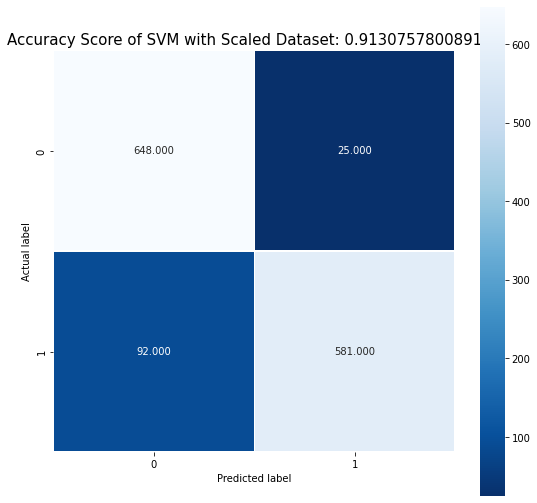

In [ ]:
classification_report(y_test,predictions)

cm = confusion_matrix (y_test,predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of SVM with Scaled Dataset: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable
    
SVM_Scaled_Report = classification_report(y_test,predictions)
  
print(SVM_Scaled_Report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       673
           1       0.96      0.86      0.91       673

    accuracy                           0.91      1346
   macro avg       0.92      0.91      0.91      1346
weighted avg       0.92      0.91      0.91      1346



In [ ]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable
    
LR_Scaled_Report = classification_report(y_test,predictions)
  
print(LR_Scaled_Report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       673
           1       0.96      0.86      0.91       673

    accuracy                           0.91      1346
   macro avg       0.92      0.91      0.91      1346
weighted avg       0.92      0.91      0.91      1346



## Random Forest Hyperparameters Scaled

n_estimatorsint, default=100
max_depthint, default=None
min_samples_splitint or float, default=2


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=20)
RFC.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
y_predicted = RFC.predict(X_test)


In [ ]:
predictions = RFC.predict(X_test_scaled)

accuracy=accuracy_score(y_test,predictions)
accuracy

0.9680534918276374

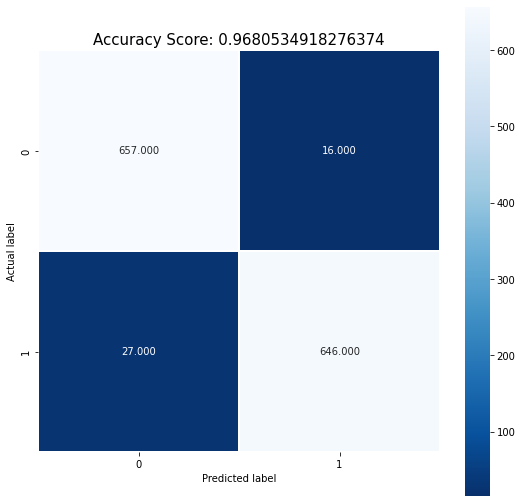

In [ ]:
classification_report(y_test,predictions)

cm = confusion_matrix (y_test,predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable
    
RF_Scaled_Report = classification_report(y_test,predictions)
  
print(RF_Scaled_Report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       673
           1       0.98      0.96      0.97       673

    accuracy                           0.97      1346
   macro avg       0.97      0.97      0.97      1346
weighted avg       0.97      0.97      0.97      1346



In [ ]:
RFC.feature_importances_

array([0.34761236, 0.01210257, 0.01019857, 0.13936171, 0.09681541,
       0.0230811 , 0.01745396, 0.03345673, 0.04328697, 0.00077625,
       0.04475466, 0.04123507, 0.00207282, 0.05160984, 0.07672597,
       0.05945601])

## Hyperparameter Grid Search with XGBoost

In [ ]:
#https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

x = stroke_df.loc[:, stroke_df.columns != 'stroke']
y = stroke_df['stroke']

train_df = X_train
Y = y
X = x
test_df = X_test


In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits

 Time taken: 0 hours 0 minutes and 18.28 seconds.


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([2.92558281, 4.50163094, 4.06948161, 3.26470709, 3.39395499]), 'std_fit_time': array([0.01558756, 0.08086   , 0.03405096, 0.00470204, 0.16438927]), 'mean_score_time': array([0.02251005, 0.09958633, 0.09167027, 0.0309972 , 0.04934629]), 'std_score_time': array([0.00042907, 0.01118566, 0.00349744, 0.00221532, 0.01835352]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dt

In [ ]:
y_test = random_search.predict_proba(X_test)

## XGBoost with Tuning (Classifer)

[source](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/) [source2](https://www.youtube.com/watch?v=ap2SS0-XPcE)

In [ ]:
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
#import xgboost as xgb

In [ ]:
seed = 7
test_size = 0.2
#X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=test_size, random_state=seed)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#fit model no training data
model = XGBClassifier(  n_estimators=600,
                        max_depth=3,
                        #objective='binary:logistic', #new objective
                        learning_rate=.02, 
                        subsample=1.0,
                        min_child_weight=5,
                        colsample_bytree=1.0,
                        gamma = 5
                       )


model.fit(X_train_scaled, y_train)

XGBClassifier(colsample_bytree=1.0, gamma=5, learning_rate=0.02,
              min_child_weight=5, n_estimators=600, subsample=1.0)

In [ ]:
predictions = model.predict(X_test_scaled)

accuracy=accuracy_score(y_test,predictions)
accuracy

ValueError: ignored

In [ ]:
classification_report(y_test,predictions)

cm = confusion_matrix (y_test,predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable
    
XB_Scaled_Report = classification_report(y_test,predictions)
  
print(XB_Scaled_Report)

In [ ]:
print(model.feature_importances_)

In [ ]:
results=pd.DataFrame()
results['columns']=X_train.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)
print(results[:])

names = list(results['columns'])
values = list(results['importances'])
  
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(names, values, color ='maroon', width = 0.2)

fig.tight_layout()

In [ ]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense



# Classification Report

In [ ]:
from sklearn.metrics import classification_report
#from prettytable import PrettyTable

models = ['Logistic Regression not scaled', 'Logistic Regression scaled','Logistc Regression Tuned & Scaled','KNN Scaled','Descision Tree Scaled','SVM not Scaled','SVM Scaled', 'Random Forest Tuned & Sclaed', 'XGBoost Scaled' ]    

Stroke_Reports = [LR_NotScaled_Report,
LR_Scaled_Report,
LR_HP_Scaled_Report,
KNN_Scaled_Report,
DT_Scaled_Report,
SVM_NotScaled_Report,
SVM_Scaled_Report,
RF_Scaled_Report,
XB_Scaled_Report,]

for i in range(0,9):
  print(models[i])
  print(Stroke_Reports[i])

Logistic Regression not scaled
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       673
           1       0.92      0.91      0.91       673

    accuracy                           0.91      1346
   macro avg       0.91      0.91      0.91      1346
weighted avg       0.91      0.91      0.91      1346

Logistic Regression scaled
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       673
           1       0.96      0.88      0.92       673

    accuracy                           0.92      1346
   macro avg       0.92      0.92      0.92      1346
weighted avg       0.92      0.92      0.92      1346

Logistc Regression Tuned & Scaled
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       673
           1       0.94      0.89      0.92       673

    accuracy                           0.92      1346
   macro avg       0.92      0.92   